In [10]:
import math
from scipy.special import comb

In [15]:
# Ensemble_Error Function Implementation
def ensemble_error(n_classifier, error):
    k_start = int(math.ceil(n_classifier / 2.))
    probs = [comb(n_classifier, k) * error**k *(1-error)**(n_classifier - k)
             
    for k in range(k_start, n_classifier + 1)]
    return sum(probs)
ensemble_error(n_classifier=11, error=0.25)

0.03432750701904297

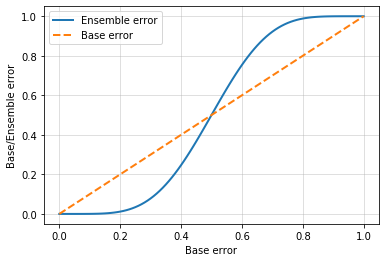

In [16]:
# Ensemble Error Rates for a range of different base errors
import numpy as np
import matplotlib.pyplot as plt

error_range = np.arange(0.0, 1.01, 0.01)
ens_errors = [ensemble_error(n_classifier=11, error=error)
    for error in error_range]

plt.plot(error_range, ens_errors, label='Ensemble error', linewidth=2)
plt.plot(error_range, error_range, linestyle='--', label='Base error', linewidth=2)
plt.xlabel('Base error'), plt.ylabel('Base/Ensemble error'), plt.legend(loc='upper left'), plt.grid(alpha=0.5)
plt.show()

In [56]:
# Implementing a simple majority vote classifier
import numpy as np
np.argmax(np.bincount([0, 0, 1], weights=[0.2, 0.2, 0.6]))

1

In [26]:
# Implement the weighted majority vote based on class probabilities, we can again
ex = np.array([[0.9, 0.1], [0.8, 0.2], [0.4, 0.6]])
p = np.average(ex, axis=0, weights=[0.2, 0.2, 0.6])
np.argmax(p)

0

In [30]:
# Implement Majority Vote Classifier
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator
class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
# classifiers : array-like, shape = [n_classifiers] : str, {'classlabel', 'probability'}
# If 'classlabel' the prediction is based on the argmax of class labels. 
# If 'probability', the argmax of the sum of probabilities is used to predict the class label
# weights : array-like, shape = [n_classifiers]

    def __init__(self, classifiers, vote='classlabel', weights=None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weights = weights

    def fit(self, X, y):
    # X : {array-like, sparse matrix}, shape = [n_samples, n_features] Matrix of training samples.
    # y : array-like, shape = [n_samples] Vector of target class labels.
        self.lablenc_ = LabelEncoder()
        self.lablenc_.fit(y)
        self.classes_ = self.lablenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(X,
            self.lablenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self

C:\Users\Nida\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [38]:
def predict(self, X):
# X : {array-like, sparse matrix}, Shape = [n_samples, n_features]
# maj_vote : array-like, shape = [n_samples] Predicted class labels.
    if self.vote == 'probability':
        maj_vote = np.argmax(self.predict_proba(X), axis=1)
    else: # 'classlabel' vote
    # Collect results from clf.predict calls
        predictions = np.asarray([clf.predict(X)
    for clf in self.classifiers_]).T
        maj_vote = np.apply_along_axis( 
        lambda x:
        np.argmax(np.bincount(x, weights=self.weights)), axis=1, arr=predictions)
        maj_vote = self.lablenc_.inverse_transform(maj_vote)
    return maj_vote

def predict_proba(self, X):
# X : {array-like, sparse matrix}, shape = [n_samples, n_features]
# avg_proba : array-like, shape = [n_samples, n_classes] Weighted average probability for each class per sample.
    probas = np.asarray([clf.predict_proba(X)
    for clf in self.classifiers_])
    avg_proba = np.average(probas,
    axis=0, weights=self.weights)
    return avg_proba

def get_params(self, deep=True):
# Get classifier parameter names for GridSearch
    if not deep:
        return super(MajorityVoteClassifier, self).get_params(deep=False)
    else:
        out = self.named_classifiers.copy()
        for name, step in six.iteritems(self.named_classifiers):
            for key, value in six.iteritems(step.get_params(deep=True)):
                out['%s__%s' % (name, key)] = value
    return out

In [39]:
# Using the majority voting principle to make predictions
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
iris = datasets.load_iris()
X, y = iris.data[50:, [1, 2]], iris.target[50:]
le = LabelEncoder()
y = le.fit_transform(y)

In [40]:
# Next, we split the Iris samples into 50 percent training and 50 percent test data:
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.5,random_state=1,stratify=y)

In [44]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
import numpy as np

clf1 = LogisticRegression(penalty='l2', C=0.001, random_state=1)
clf2 = DecisionTreeClassifier(max_depth=1, criterion='entropy', random_state=0)
clf3 = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
pipe1 = Pipeline([['sc', StandardScaler()], ['clf', clf1]])
pipe3 = Pipeline([['sc', StandardScaler()], ['clf', clf3]])
clf_labels = ['Logistic regression', 'Decision tree', 'KNN']
print('10-fold cross validation:\n')
for clf, label in zip([pipe1, clf2, pipe3], clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print("ROC AUC: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

10-fold cross validation:

ROC AUC: 0.92 (+/- 0.15) [Logistic regression]
ROC AUC: 0.87 (+/- 0.18) [Decision tree]
ROC AUC: 0.85 (+/- 0.13) [KNN]


In [47]:
# Now let's move on to the more exciting part and combine the individual classifiers for majority rule voting in our MajorityVoteClassifier:
mv_clf = MajorityVoteClassifier(classifiers=[pipe1, clf2, pipe3])
clf_labels += ['Majority voting']
all_clf = [pipe1, clf2, pipe3, mv_clf]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf, X=X_train, y=y_train, cv=10, scoring='roc_auc')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.92 (+/- 0.15) [Logistic regression]
Accuracy: 0.87 (+/- 0.18) [Decision tree]
Accuracy: 0.85 (+/- 0.13) [KNN]


AttributeError: 'MajorityVoteClassifier' object has no attribute 'predict_proba'

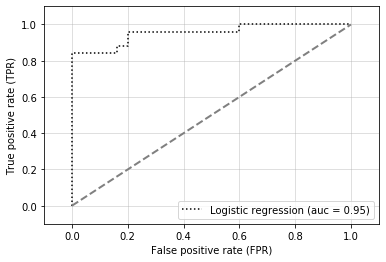

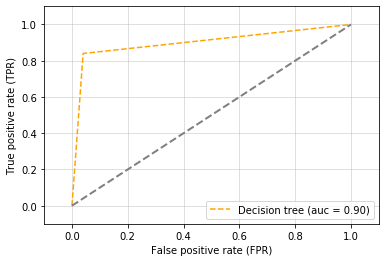

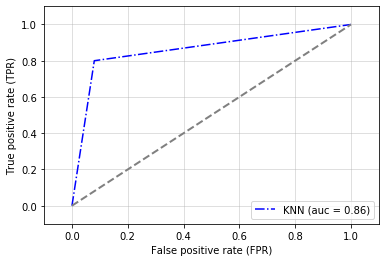

AttributeError: 'MajorityVoteClassifier' object has no attribute 'predict_proba'

In [54]:
# Evaluating and tuning the ensemble classifier
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
colors = ['black', 'orange', 'blue', 'green']
linestyles = [':', '--', '-.', '-']
for clf, label, clr, ls in zip(all_clf, clf_labels, colors, linestyles):
    # assuming the label of the positive class is 1
    y_pred = clf.fit(X_train, y_train).predict_proba(X_test)[:, 1]
    
    fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_pred)
    roc_auc = auc(x=fpr, y=tpr)
    
    plt.plot(fpr, tpr, color=clr, linestyle=ls, label='%s (auc = %0.2f)' % (label, roc_auc))
    plt.legend(loc='lower right')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray',linewidth=2)
    plt.xlim([-0.1, 1.1]), plt.ylim([-0.1, 1.1]), plt.grid(alpha=0.5)
    plt.xlabel('False positive rate (FPR)'), plt.ylabel('True positive rate (TPR)'), plt.show()

AttributeError: 'MajorityVoteClassifier' object has no attribute 'predict'

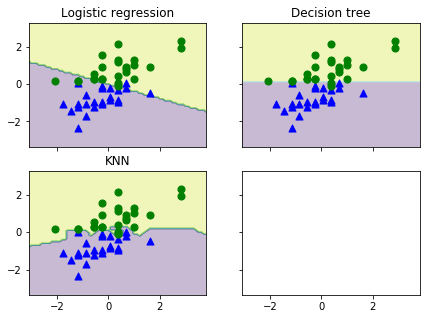

In [49]:
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)

from itertools import product

x_min = X_train_std[:, 0].min() - 1
x_max = X_train_std[:, 0].max() + 1
y_min = X_train_std[:, 1].min() - 1
y_max = X_train_std[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=2, ncols=2, sharex='col', sharey='row', figsize=(7, 5))
for idx, clf, tt in zip(product([0, 1], [0, 1]), all_clf, clf_labels):
    clf.fit(X_train_std, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx[0], idx[1]].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==0, 0],
    X_train_std[y_train==0, 1], c='blue', marker='^', s=50)
    axarr[idx[0], idx[1]].scatter(X_train_std[y_train==1, 0], X_train_std[y_train==1, 1], c='green', marker='o', s=50)
    axarr[idx[0], idx[1]].set_title(tt)
plt.text(-3.5, -4.5, s='Sepal width [standardized]', ha='center', va='center', fontsize=12)
plt.text(-10.5, 4.5, s='Petal length [standardized]', ha='center', va='center', fontsize=12, rotation=90)
plt.show()

In [51]:
#Before we tune the individual classifier's parameters for ensemble classification, let's
#call the get_params method to get a basic idea of how we can access the individual
#parameters inside a GridSearch object:
mv_clf.get_params()
{'decisiontreeclassifier': DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=1,
max_features=None, max_leaf_nodes=None,
min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, random_state=0, splitter='best'),
'decisiontreeclassifier__class_weight': None,
'decisiontreeclassifier__criterion': 'entropy',
[]
'decisiontreeclassifier__random_state': 0,
'decisiontreeclassifier__splitter': 'best',
'pipeline-1': Pipeline(steps=[('sc', StandardScaler(copy=True,
with_mean=True, with_std=True)), ('clf', LogisticRegression(C=0.001,
class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr',
penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
verbose=0))]),
'pipeline-1__clf': LogisticRegression(C=0.001, class_weight=None,
dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr',
penalty='l2', random_state=0, solver='liblinear',
tol=0.0001,
verbose=0),
'pipeline-1__clf__C': 0.001,
'pipeline-1__clf__class_weight': None,
'pipeline-1__clf__dual': False,
[...]
'pipeline-1__sc__with_std': True,
'pipeline-2': Pipeline(steps=[('sc', StandardScaler(copy=True,
with_mean=True, with_std=True)), ('clf',
KNeighborsClassifier(algorithm='auto', leaf_size=30,
metric='minkowski',
metric_params=None, n_neighbors=1, p=2,
weights='uniform'))]),
'pipeline-2__clf': KNeighborsClassifier(algorithm='auto',
leaf_size=30, metric='minkowski',
metric_params=None, n_neighbors=1, p=2, weights='uniform'),
'pipeline-2__clf__algorithm': 'auto',
[...]
'pipeline-2__sc__with_std': True}

SyntaxError: invalid syntax (<ipython-input-51-576eb0a089a4>, line 15)

In [68]:
#Based on the values returned by the get_params method, we now know how to
#access the individual classifier's attributes. Let's now tune the inverse regularization
#parameter C of the logistic regression classifier and the decision tree depth via a grid
#search for demonstration purposes:
from sklearn.model_selection import GridSearchCV
params = {'decisiontreeclassifier__max_depth': [1, 2],
    'pipeline-1__clf__C': [0.001, 0.1, 100.0]}
grid = GridSearchCV(estimator=mv_clf,
    param_grid=params,
    cv=10,
    scoring='roc_auc')
grid.fit(X_train, y_train)

ValueError: Invalid parameter decisiontreeclassifier for estimator MajorityVoteClassifier(classifiers=[Pipeline(memory=None,
                                             steps=[('sc',
                                                     StandardScaler(copy=True,
                                                                    with_mean=True,
                                                                    with_std=True)),
                                                    ['clf',
                                                     LogisticRegression(C=0.001,
                                                                        class_weight=None,
                                                                        dual=False,
                                                                        fit_intercept=True,
                                                                        intercept_scaling=1,
                                                                        l1_ratio=None,
                                                                        max_iter=100,
                                                                        multi_class='auto',
                                                                        n_jobs=None,
                                                                        penalty='l2',
                                                                        random_state=1,
                                                                        solver='lbfgs',
                                                                        tol=0.0001,
                                                                        verbose=0,...
                                                           min_weight_fraction_leaf=0.0,
                                                           presort='deprecated',
                                                           random_state=0,
                                                           splitter='best'),
                                    Pipeline(memory=None,
                                             steps=[('sc',
                                                     StandardScaler(copy=True,
                                                                    with_mean=True,
                                                                    with_std=True)),
                                                    ['clf',
                                                     KNeighborsClassifier(algorithm='auto',
                                                                          leaf_size=30,
                                                                          metric='minkowski',
                                                                          metric_params=None,
                                                                          n_jobs=None,
                                                                          n_neighbors=1,
                                                                          p=2,
                                                                          weights='uniform')]],
                                             verbose=False)],
                       vote='classlabel', weights=None). Check the list of available parameters with `estimator.get_params().keys()`.

In [69]:
#After the grid search has completed, we can print the different hyperparameter value
#combinations and the average ROC AUC scores computed via 10-fold crossvalidation
#as follows:
for params, mean_score, scores in grid.grid_scores_:
    print("%0.3f+/-%0.2f %r"
    % (mean_score, scores.std() / 2, params))

print('Best parameters: %s' % grid.best_params_)
print('Accuracy: %.2f' % grid.best_score_)

AttributeError: 'GridSearchCV' object has no attribute 'grid_scores_'

# WINE PROBLEM

In [71]:
# Bagging – building an ensemble of classifiers from bootstrap samples
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/' 'machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol','Malic acid', 'Ash','Alcalinity of ash','Magnesium', 'Total phenols',
    'Flavanoids', 'Nonflavanoid phenols','Proanthocyanins','Color intensity', 'Hue','OD280/OD315 of diluted wines','Proline']
# drop 1 class
df_wine = df_wine[df_wine['Class label'] != 1]
y = df_wine['Class label'].values
X = df_wine[['Alcohol','OD280/OD315 of diluted wines']].values

Decision tree train/test accuracies 1.000/0.833
Bagging train/test accuracies 1.000/0.917
AdaBoost train/test accuracies 1.000/0.833


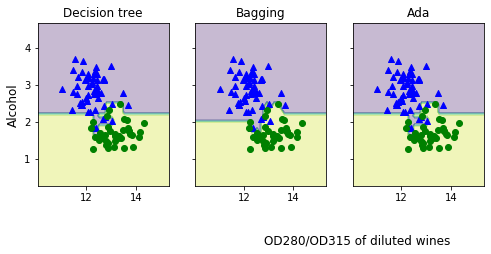

In [86]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

y = LabelEncoder().fit_transform(y)                                                                        # Encode class labels
X_train, X_test, y_train, y_test =train_test_split(X, y,test_size=0.2,random_state=1, stratify=y)          # Split the dataset

tree = DecisionTreeClassifier(criterion='entropy',random_state=1,max_depth=None)
tree = tree.fit(X_train, y_train)
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)
tree_train = accuracy_score(y_train, y_train_pred)
tree_test = accuracy_score(y_test, y_test_pred)
print('Decision tree train/test accuracies %.3f/%.3f' % (tree_train, tree_test))

bag = BaggingClassifier(base_estimator=tree,n_estimators=500,max_samples=1.0,max_features=1.0,bootstrap=True,
                        bootstrap_features=False,n_jobs=1,random_state=1)
bag = bag.fit(X_train, y_train)
y_train_pred = bag.predict(X_train)
y_test_pred = bag.predict(X_test)
bag_train = accuracy_score(y_train, y_train_pred)
bag_test = accuracy_score(y_test, y_test_pred)
print('Bagging train/test accuracies %.3f/%.3f' % (bag_train, bag_test))

ada = AdaBoostClassifier(base_estimator=tree, n_estimators=500, learning_rate=0.1, random_state=1)
ada = ada.fit(X_train, y_train)
y_train_pred = ada.predict(X_train)
y_test_pred = ada.predict(X_test)
ada_train = accuracy_score(y_train, y_train_pred)
ada_test = accuracy_score(y_test, y_test_pred)
print('AdaBoost train/test accuracies %.3f/%.3f' % (ada_train, ada_test))

# let's compare the decision regions between the decision tree and the bagging classifier:
x_min = X_train[:, 0].min() - 1
x_max = X_train[:, 0].max() + 1
y_min = X_train[:, 1].min() - 1
y_max = X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
f, axarr = plt.subplots(nrows=1, ncols=3, sharex='col', sharey='row', figsize=(8, 3))


for idx, clf, tt in zip([0, 1, 2], [tree, bag, ada], ['Decision tree', 'Bagging', 'Ada']):
    clf.fit(X_train, y_train)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axarr[idx].contourf(xx, yy, Z, alpha=0.3)
    axarr[idx].scatter(X_train[y_train==0, 0],X_train[y_train==0, 1],c='blue', marker='^')
    axarr[idx].scatter(X_train[y_train==1, 0],X_train[y_train==1, 1],c='green', marker='o')
    axarr[idx].set_title(tt)

axarr[0].set_ylabel('Alcohol', fontsize=12)
plt.text(10.2, -1.2, s='OD280/OD315 of diluted wines', ha='center', va='center', fontsize=12)
plt.show()

# Diabetes Problem

In [91]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
seed = 7
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
cart = DecisionTreeClassifier()

modelBagging       = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed) # Bagged Decision Trees
modelRandomForest  = RandomForestClassifier(n_estimators=num_trees, max_features=3) # Random Forest Classification
modelExtraTrees    = ExtraTreesClassifier(n_estimators=num_trees, max_features=7) # Extra Trees Classification
modelAdaBoost      = AdaBoostClassifier(n_estimators=num_trees, random_state=seed) # AdaBoost Classification
modelGradientBoost = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed) # Stochastic Gradient Boosting

resultsBagging       = model_selection.cross_val_score(modelBagging, X, Y, cv=kfold)
resultsRandomForest  = model_selection.cross_val_score(modelRandomForest, X, Y, cv=kfold)
resultsExtraTrees    = model_selection.cross_val_score(modelExtraTrees, X, Y, cv=kfold)
resultsAdaBoost      = model_selection.cross_val_score(modelAdaBoost, X, Y, cv=kfold)
resultsGradientBoost = model_selection.cross_val_score(modelGradientBoost, X, Y, cv=kfold)

print("Bagging       =" , resultsBagging.mean())
print("RandomForest  =" , resultsRandomForest.mean())
print("ExtraTrees    =" , resultsExtraTrees.mean())
print("AdaBoost      =" , resultsAdaBoost.mean())
print("GradientBoost =" , resultsGradientBoost.mean())

Bagging       = 0.759125085440875
RandomForest  = 0.7655673274094327
ExtraTrees    = 0.7564764183185236
AdaBoost      = 0.7578605604921395
GradientBoost = 0.7591934381408066
